In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from highlight_text import fig_text

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaabhishekk/undershot_backup/master/understat_all_shots.csv")
df.head(10)

,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.707,0.379,0,Hoffenheim,29-08-2015 17:30,h,0,Darmstadt,76737,Aerial,1044,93,György Garics,NaN,2,MissedShots,2015,RightFoot,FromCorner,0.011869
1,0.728,0.373,1,Darmstadt,12-09-2015 17:30,a,0,Bayer Leverkusen,76808,Pass,1053,1,György Garics,Konstantin Rausch,2,SavedShot,2015,RightFoot,SetPiece,0.015980
2,0.016,0.464,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78492,Foul,1118,67,György Garics,NaN,2,OwnGoal,2015,Head,SetPiece,0.000000
3,0.875,0.521,2,Darmstadt,20-12-2015 20:30,a,3,Borussia M.Gladbach,79876,Aerial,1173,58,György Garics,NaN,2,MissedShots,2015,Head,FromCorner,0.016684
4,0.927,0.557,2,Werder Bremen,07-12-2014 16:30,a,5,Eintracht Frankfurt,27374,Pass,5320,78,Luca Caldirola,Fin Bartels,3,Goal,2014,LeftFoot,OpenPlay,0.432700
5,0.899,0.598,2,Darmstadt,27-09-2015 19:30,a,2,Borussia Dortmund,77444,None,1083,11,Luca Caldirola,NaN,3,MissedShots,2015,RightFoot,SetPiece,0.072897
6,0.980,0.472,2,Darmstadt,17-10-2015 17:30,a,0,Augsburg,78030,None,1094,28,Luca Caldirola,NaN,3,BlockedShot,2015,LeftFoot,FromCorner,0.794784
7,0.984,0.476,2,Darmstadt,17-10-2015 17:30,a,0,Augsburg,78029,Rebound,1094,28,Luca Caldirola,Jan Rosenthal,3,SavedShot,2015,LeftFoot,FromCorner,0.946339
8,0.885,0.433,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78500,Cross,1118,86,Luca Caldirola,Mario Vrancic,3,SavedShot,2015,LeftFoot,OpenPlay,0.065162
9,0.942,0.635,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78501,Aerial,1118,87,Luca Caldirola,Tobias Kempe,3,SavedShot,2015,Head,FromCorner,0.013303


In [7]:
g = df.query("result=='Goal'").groupby(["player", "situation"])\
                              .agg({"result":"count"})\
                              .reset_index()\
                              .pivot(index="player", columns="situation", values="result")\
                              .fillna(0)
g["total"] = g[g.columns].sum(axis=1)
g = g.sort_values("total", ascending=False).head(10)
g = g[['OpenPlay', 'Penalty', 'DirectFreekick', 'FromCorner', 'SetPiece', 'total']]

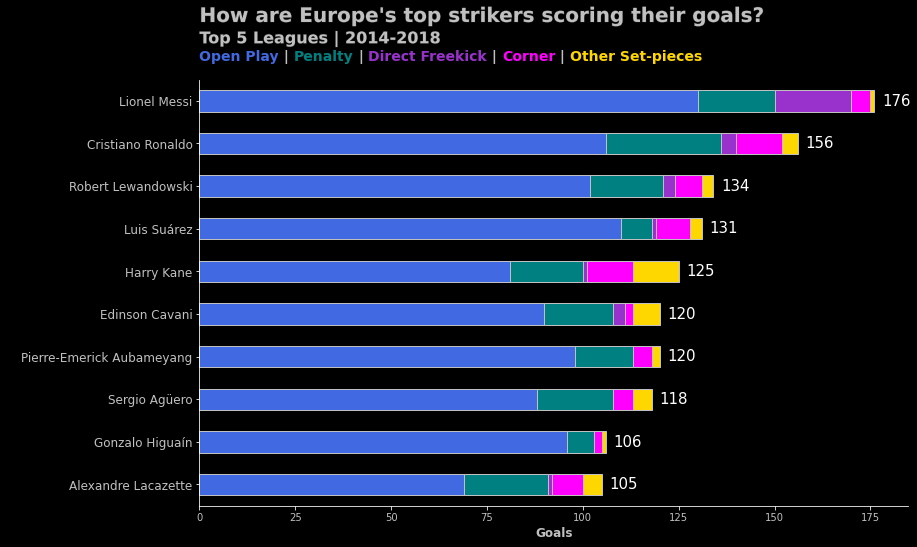

In [14]:
line_color = "silver"
column_color_dict = {'OpenPlay': "royalblue",
                     'Penalty': "teal",
                     'DirectFreekick': "darkorchid",
                     'FromCorner': "magenta",
                     'SetPiece': "gold"
                    }

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helevetica' ##set global font
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = g[column_color_dict.keys()].iloc[::-1].plot.barh(stacked=True, ax=ax, color=column_color_dict, 
                                               ec="silver", legend=None)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)  
        
    ax.grid(False)    
    ax.set_position([0.08, 0.08, 0.82, 0.74]) ## make space for the title on top of the axes
    
    for num, total in enumerate(g["total"].iloc[::-1]):
        ax.text(total+2, num, int(total), va='center', ha='left', fontsize=15)
    
    ## labels, titles and subtitles
    ax.set(ylabel=" ", xlabel="Goals")     
    ax.xaxis.label.set(fontsize=12, fontweight='bold', color=line_color)    
    
    for label in ax.get_yticklabels():
        label.set(color=line_color, fontsize=12)
    for t in ax.xaxis.get_ticklabels():
        t.set_color(line_color)
    
    ## titles, subtitles, and custom legend (Peter McKeever style)
    fig.text(x=0.08, y=0.92, s="How are Europe's top strikers scoring their goals?", 
            ha='left', fontsize=20, fontweight='bold', color=line_color,
            path_effects=[pe.Stroke(linewidth=1.1, foreground='0.1'),
                       pe.Normal()]) 
    
    fig.text(x=0.08, y=0.883, s="Top 5 Leagues | 2014-2018", 
            ha='left', fontsize=16, fontweight='bold', color=line_color,
            path_effects=[pe.Stroke(linewidth=1.1, foreground='0.1'),
                       pe.Normal()])     
    
    fig_text(x=0.08, y=0.872, ha='left',
             fontsize=14, fontweight='bold',
             color=line_color,
             s='<Open Play> | <Penalty> | <Direct Freekick> | <Corner> | <Other Set-pieces>',
             highlight_textprops=[{"color": "royalblue"},
                                  {"color": "teal"}, 
                                  {"color": "darkorchid"}, 
                                  {"color": "magenta"}, 
                                  {"color": "gold"}]
            )
    
fig.savefig("shooter-bar-chart", dpi=180) ##save image